<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/week4_dimensionality_reduction_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
mnist = io.loadmat('./drive/MyDrive/Colab Notebooks/ToBigs/week4_KNN&neighbors/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [6]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [7]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [9]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

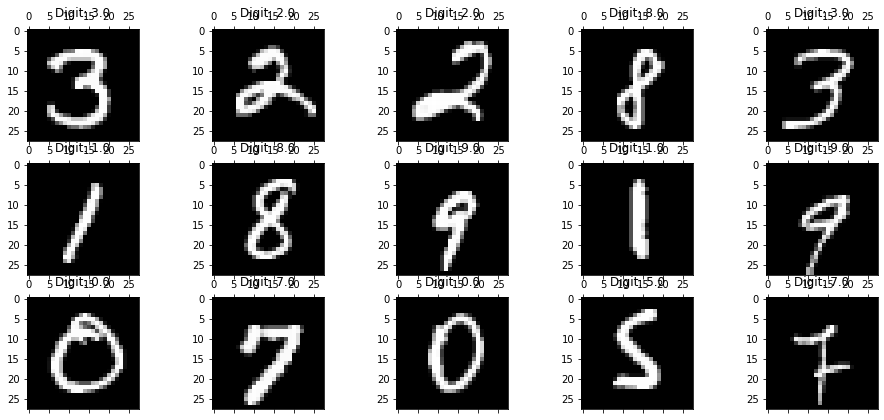

In [10]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

1. Rule of Thumb
- 총분산설명하는비중이70%~90%사이에서선택
- 평균고유값(σⅈ 𝜆𝑖 ) / 𝑝 보다작은고유값을갖는주성분
제거
: 평균고유값= 평균분산
: 표준화된변수를사용한다면평균분산=1 이므로1보다작은고유값제거
: 0.7보다작은고유값을제거하는것제안하기도함
2. Scree plot 활용
: 곡선의기울기가급격히감소하는시점(Elbowpoint)

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [29]:
# 분산 설명하는 비중 70%, 80%, 90%인 경우
pca_70 = PCA(n_components=0.7)
pca_70.fit(X_train_std)

pca_80 = PCA(n_components=0.8)
pca_80.fit(X_train_std)

pca_90 = PCA(n_components=0.9)
pca_90.fit(X_train_std)

print('분산 설명하는 비중 70%: ', pca_70.n_components_)
print('분산 설명하는 비중 80%: ', pca_80.n_components_)
print('분산 설명하는 비중 90%: ', pca_90.n_components_)

분산 설명하는 비중 70%:  97
분산 설명하는 비중 80%:  147
분산 설명하는 비중 90%:  234


In [25]:
# 고유값이 1이상인 주성분 개수
pca = PCA()
pca.fit(X_train_std)
var = pca.explained_variance_
var[var>=1].shape

(161,)

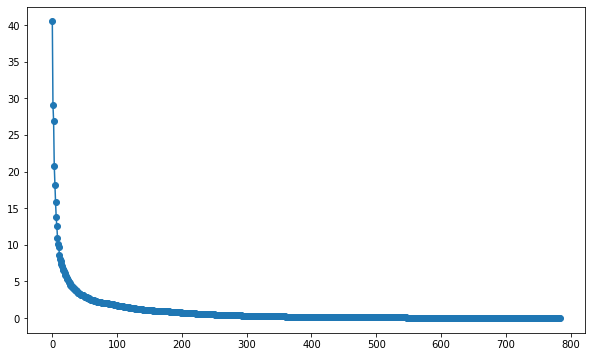

In [18]:
# Elbow Point
plt.figure(figsize=(10, 6))
plt.plot(np.arange(var.shape[0]), var, marker='o')
plt.show()
# 잘 확인되지 않지만 0~100 사이에 존재할거라 예상

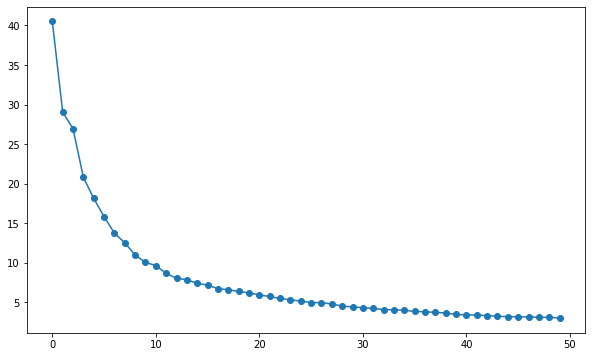

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(var[:50].shape[0]), var[:50], marker='o')
plt.show()
# 0 ~ 50 사이에 elbow point가 있을거라 예상됨.

In [26]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train ,y_train.reshape(-1))
X_lda.shape
# 9개로 축소됨

(56000, 9)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import time   
from sklearn.metrics import accuracy_score 

### Randomforest

In [30]:
# 원본
rf = RandomForestClassifier(random_state=123)
start = time.time()
rf.fit(X_train_std, y_train)
end = time.time()

print(f'training time: {end-start}')
print(f'accuracy score: {accuracy_score(y_test, rf.predict(X_test_std))}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


training time: 67.95581698417664
accuracy score: 0.9636428571428571


In [31]:
# pca
# 주성분 개수 : 97개 (70%인 경우로 선택)
pca=PCA(n_components=97)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
rf_pca = RandomForestClassifier(random_state=123)
start = time.time()
rf_pca.fit(X_train_pca, y_train)
end = time.time()

print(f'training time: {end-start}')
print(f'accuracy score: {accuracy_score(y_test, rf_pca.predict(X_test_pca))}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


training time: 88.73780846595764
accuracy score: 0.9471428571428572


In [35]:
# lda
# 9개
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lda_rf = RandomForestClassifier(random_state=123)
t1 = time.time()
lda_rf.fit(X_train_lda, y_train)
t2 = time.time()

print(f'training time: {end-start}, accuracy score: {accuracy_score(y_test, lda_rf.predict(X_test_lda))}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


training time: 88.73780846595764, accuracy score: 0.9137142857142857


### Logisticregression

In [36]:
# 원본
lgr = LogisticRegression(random_state=123)
start = time.time()
lgr.fit(X_train_std, y_train)
end = time.time()

print(f'training time: {end-start}')
print(f'accuracy score: {accuracy_score(y_test, lgr.predict(X_test_std))}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training time: 56.58418536186218
accuracy score: 0.9155714285714286


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
# pca
pca_lgr = LogisticRegression(random_state=123)
start = time.time()
pca_lgr.fit(X_train_pca, y_train)
end = time.time()

print(f'training time: {end-start}')
print(f'accuracy score: {accuracy_score(y_test,pca_lgr.predict(X_test_pca))}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training time: 13.504869937896729
accuracy score: 0.9174285714285715


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
# lda
lda_lgr = LogisticRegression(random_state=123)
start = time.time()
lda_lgr.fit(X_train_lda, y_train)
end = time.time()

print(f'training time: {end-start}')
print(f'accuracy score: {accuracy_score(y_test,lda_lgr.predict(X_test_lda))}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training time: 6.332558870315552
accuracy score: 0.8848571428571429
